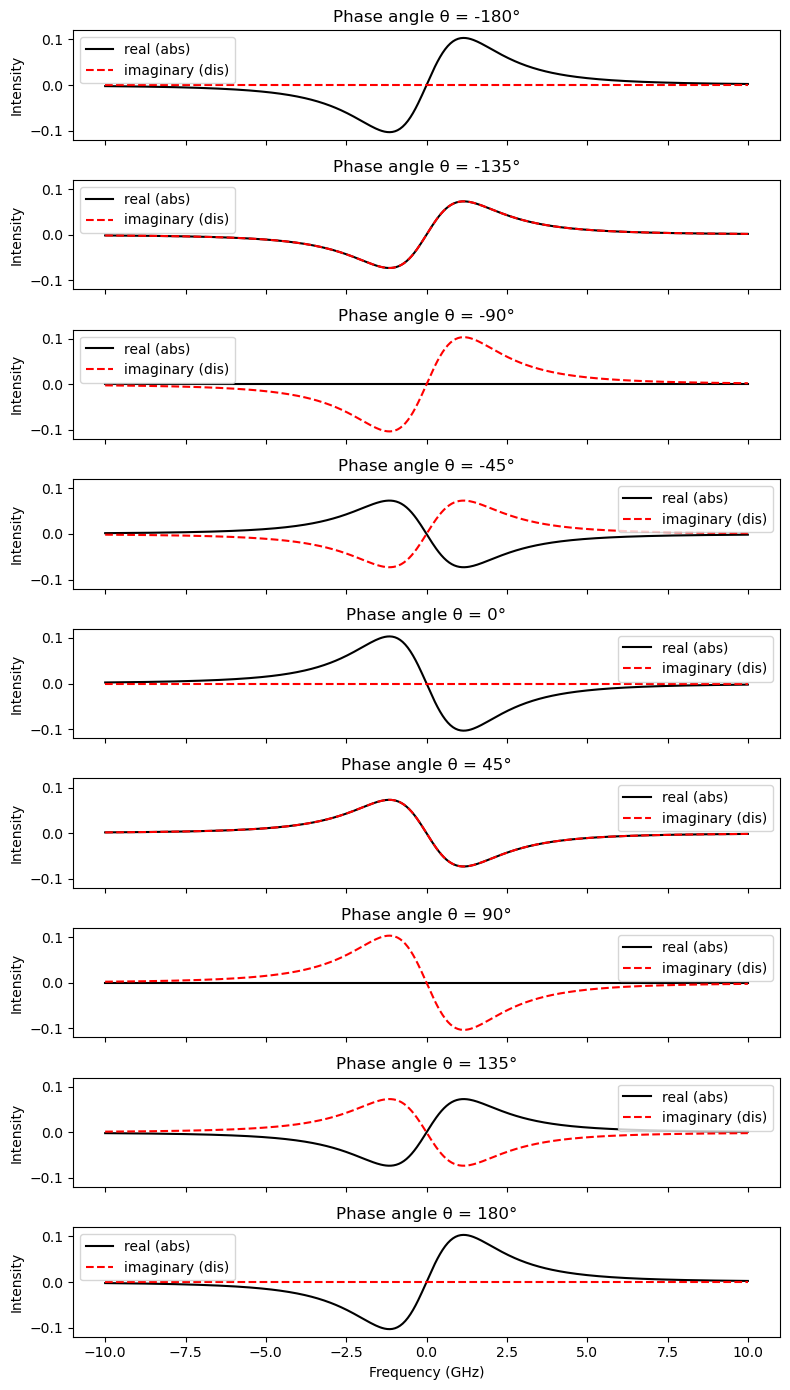

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 生成 EPR 频谱的频率轴
frequencies = np.linspace(-10, 10, 500)  # 假设磁场或频率范围为 [-10, 10]

# 生成一个微分洛伦兹型 EPR 信号
def lorentzian(f, f0, gamma):
    """洛伦兹峰函数"""
    return 1 / (np.pi * gamma * (1 + ((f - f0) / gamma)**2))

def derivative_lorentzian(f, f0, gamma):
    """微分洛伦兹峰函数（EPR信号常见）"""
    L = lorentzian(f, f0, gamma)
    dL = -2 * (f - f0) / (gamma**2 * np.pi * (1 + ((f - f0) / gamma)**2)**2)
    return dL

# 设定 EPR 信号参数
f0 = 0       # 中心频率
gamma = 2.0  # 线宽参数
X = derivative_lorentzian(frequencies, f0, gamma)  # 真实的 EPR 信号
Y = np.zeros_like(X)  # 初始虚部设为 0

# 组合成复数数据
S = X + 1j * Y

# 设定多个相位角
theta_values = [-180, -135, -90, -45, 0, 45, 90, 135, 180]  # 角度 (单位：度)
fig, axes = plt.subplots(len(theta_values), 1, figsize=(8, 14), sharex=True)

for i, theta_deg in enumerate(theta_values):
    theta_rad = np.deg2rad(theta_deg)  # 转换为弧度
    S_rotated = S * np.exp(1j * theta_rad)  # 旋转信号
    X_rotated = S_rotated.real
    Y_rotated = S_rotated.imag

    # 画出相位旋转后的信号
    ax = axes[i]
    ax.plot(frequencies, X_rotated, label="real (abs)", color="black")
    ax.plot(frequencies, Y_rotated, label="imaginary (dis)", color="red", linestyle="dashed")
    ax.set_ylim(-0.12, 0.12)
    ax.set_title(f"Phase angle θ = {theta_deg}°")
    ax.legend()
    ax.set_ylabel("Intensity")

axes[-1].set_xlabel("Frequency (GHz)")
plt.tight_layout()
plt.show()


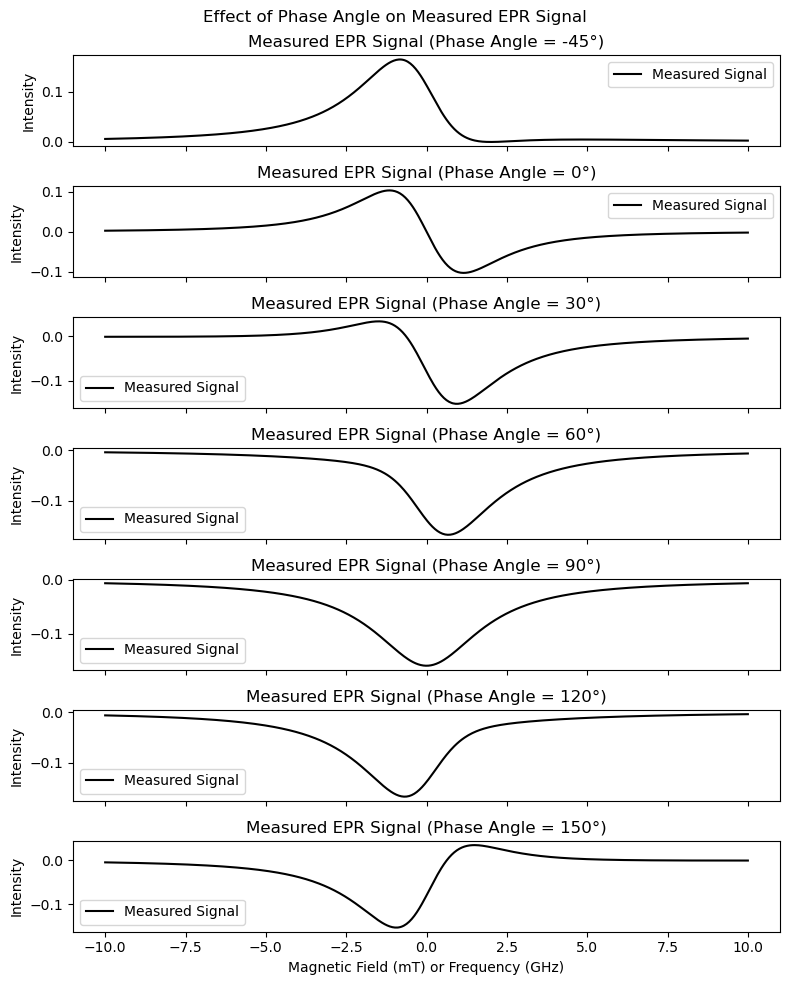

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate frequency axis (magnetic field or microwave frequency)
frequencies = np.linspace(-10, 10, 500)

# Lorentzian function
def lorentzian(f, f0, gamma):
    return 1 / (np.pi * gamma * (1 + ((f - f0) / gamma)**2))

# Derivative of Lorentzian (common in EPR)
def derivative_lorentzian(f, f0, gamma):
    L = lorentzian(f, f0, gamma)
    dL = -2 * (f - f0) / (gamma**2 * np.pi * (1 + ((f - f0) / gamma)**2)**2)
    return dL

# Define EPR signal parameters
f0 = 0      # Resonance center
gamma = 2.0 # Linewidth
X = derivative_lorentzian(frequencies, f0, gamma)  # Absorption-like signal
Y = lorentzian(frequencies, f0, gamma)  # Dispersion-like signal

# Combine real and imaginary parts into a complex signal
S = X + 1j * Y

# Define multiple phase angles
theta_values = [-45, 0, 30, 60, 90, 120, 150]  # Phase angles in degrees
fig, axes = plt.subplots(len(theta_values), 1, figsize=(8, 10), sharex=True)

for i, theta_deg in enumerate(theta_values):
    theta_rad = np.deg2rad(theta_deg)  # Convert degrees to radians
    S_rotated = S * np.exp(1j * theta_rad)  # Apply phase rotation
    measured_signal = S_rotated.real  # The measured signal is the real part

    # Plot the measured signal
    ax = axes[i]
    ax.plot(frequencies, measured_signal, color="black", label="Measured Signal")
    ax.set_title(f"Measured EPR Signal (Phase Angle = {theta_deg}°)")
    ax.legend()
    ax.set_ylabel("Intensity")

axes[-1].set_xlabel("Magnetic Field (mT) or Frequency (GHz)")
plt.suptitle("Effect of Phase Angle on Measured EPR Signal")
plt.tight_layout()
plt.show()


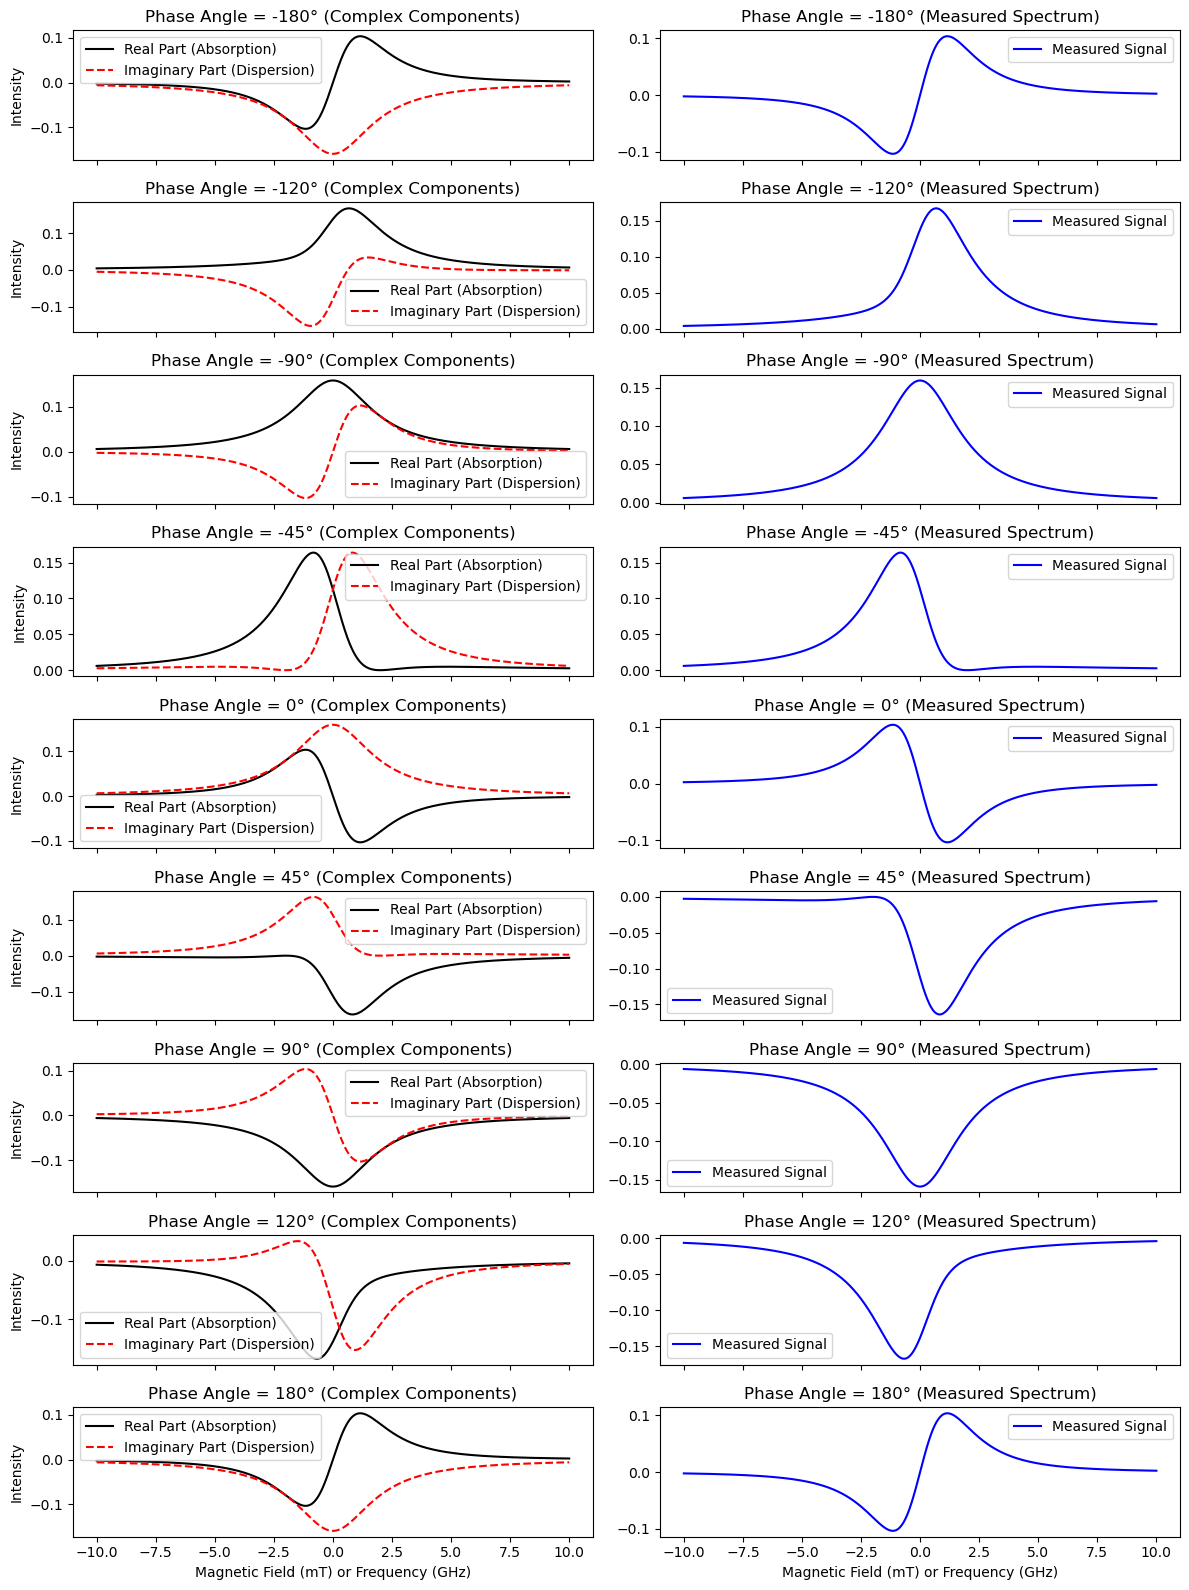

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate frequency axis
frequencies = np.linspace(-10, 10, 500)

# Lorentzian function
def lorentzian(f, f0, gamma):
    return 1 / (np.pi * gamma * (1 + ((f - f0) / gamma)**2))

# Derivative of Lorentzian (common in EPR)
def derivative_lorentzian(f, f0, gamma):
    L = lorentzian(f, f0, gamma)
    dL = -2 * (f - f0) / (gamma**2 * np.pi * (1 + ((f - f0) / gamma)**2)**2)
    return dL

# Define EPR signal parameters
f0 = 0      # Resonance center
gamma = 2.0 # Linewidth
X = derivative_lorentzian(frequencies, f0, gamma)  # Absorption-like signal
Y = lorentzian(frequencies, f0, gamma)  # Dispersion-like signal

# Combine real and imaginary parts into a complex signal
S = X + 1j * Y

# Define multiple phase angles
theta_values = [-180, -120, -90, -45, 0, 45, 90, 120, 180]  # Phase angles in degrees
fig, axes = plt.subplots(len(theta_values), 2, figsize=(12, 16), sharex=True)

for i, theta_deg in enumerate(theta_values):
    theta_rad = np.deg2rad(theta_deg)  # Convert degrees to radians
    S_rotated = S * np.exp(1j * theta_rad)  # Apply phase rotation
    X_rotated = S_rotated.real  # Absorption-like component
    Y_rotated = S_rotated.imag  # Dispersion-like component
    measured_signal = X_rotated  # The measured signal is the real part after phase rotation

    # Left plot: Real and Imaginary components
    ax1 = axes[i, 0]
    ax1.plot(frequencies, X_rotated, label="Real Part (Absorption)", color="black")
    ax1.plot(frequencies, Y_rotated, label="Imaginary Part (Dispersion)", color="red", linestyle="dashed")
    ax1.set_title(f"Phase Angle = {theta_deg}° (Complex Components)")
    ax1.legend()
    ax1.set_ylabel("Intensity")

    # Right plot: Measured signal
    ax2 = axes[i, 1]
    ax2.plot(frequencies, measured_signal, color="blue", label="Measured Signal")
    ax2.set_title(f"Phase Angle = {theta_deg}° (Measured Spectrum)")
    ax2.legend()

axes[-1, 0].set_xlabel("Magnetic Field (mT) or Frequency (GHz)")
axes[-1, 1].set_xlabel("Magnetic Field (mT) or Frequency (GHz)")

# plt.suptitle("Effect of Phase Angle on EPR Signal")
plt.tight_layout()
plt.show()
